## What is the importance of Ocean Fronts?
--> Ocean fronts play a key role in ocean dynamics and biogeochemical processes. 

(Figure extracted from Chapman et al., 2020)

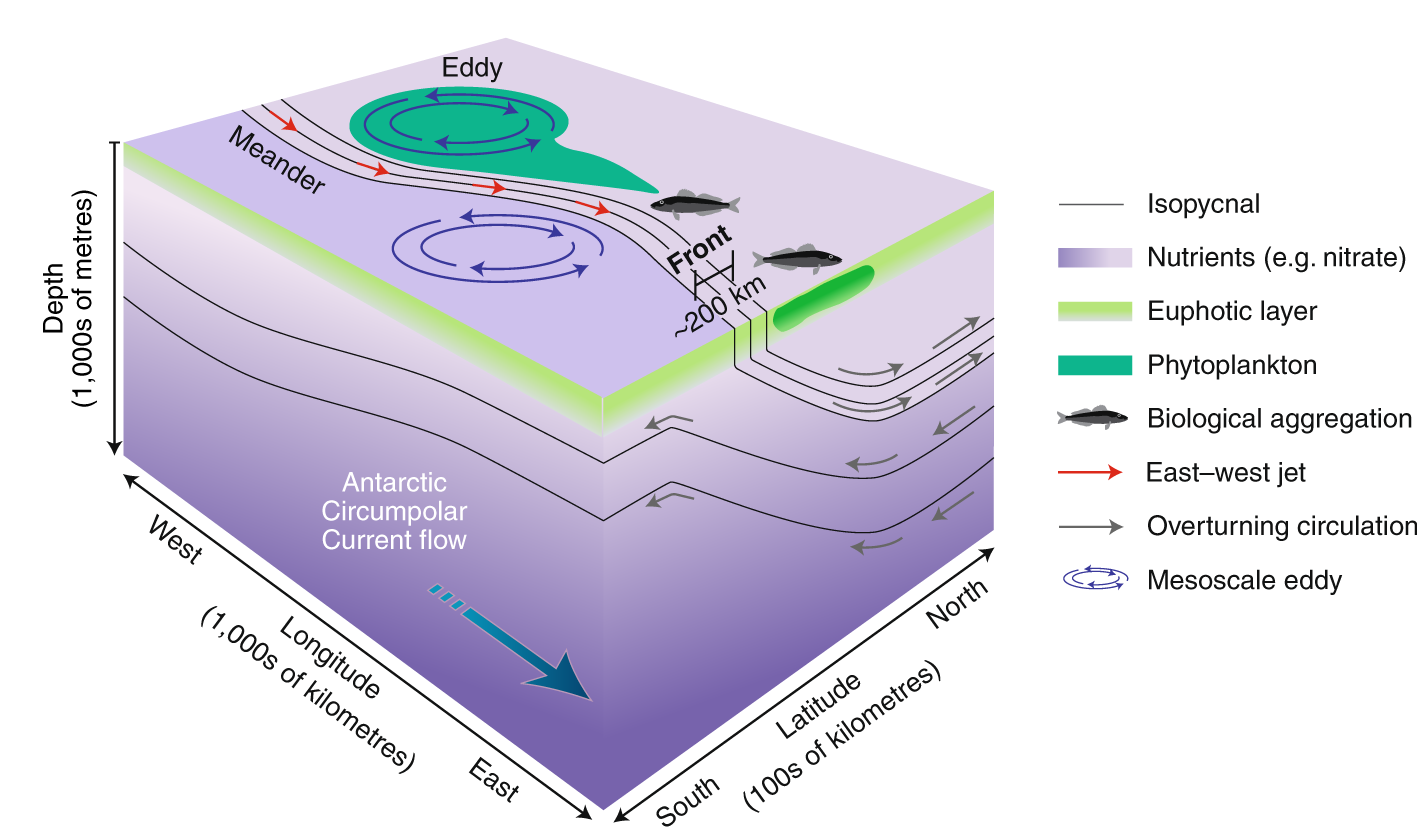

## Methods

#### Peaks in the SSH gradient captures regions of strong surface-to-bottom density gradients 
#### (e.g., the ACC fronts)

(Figure extracted from Sokolov and Rintoul, 2017)

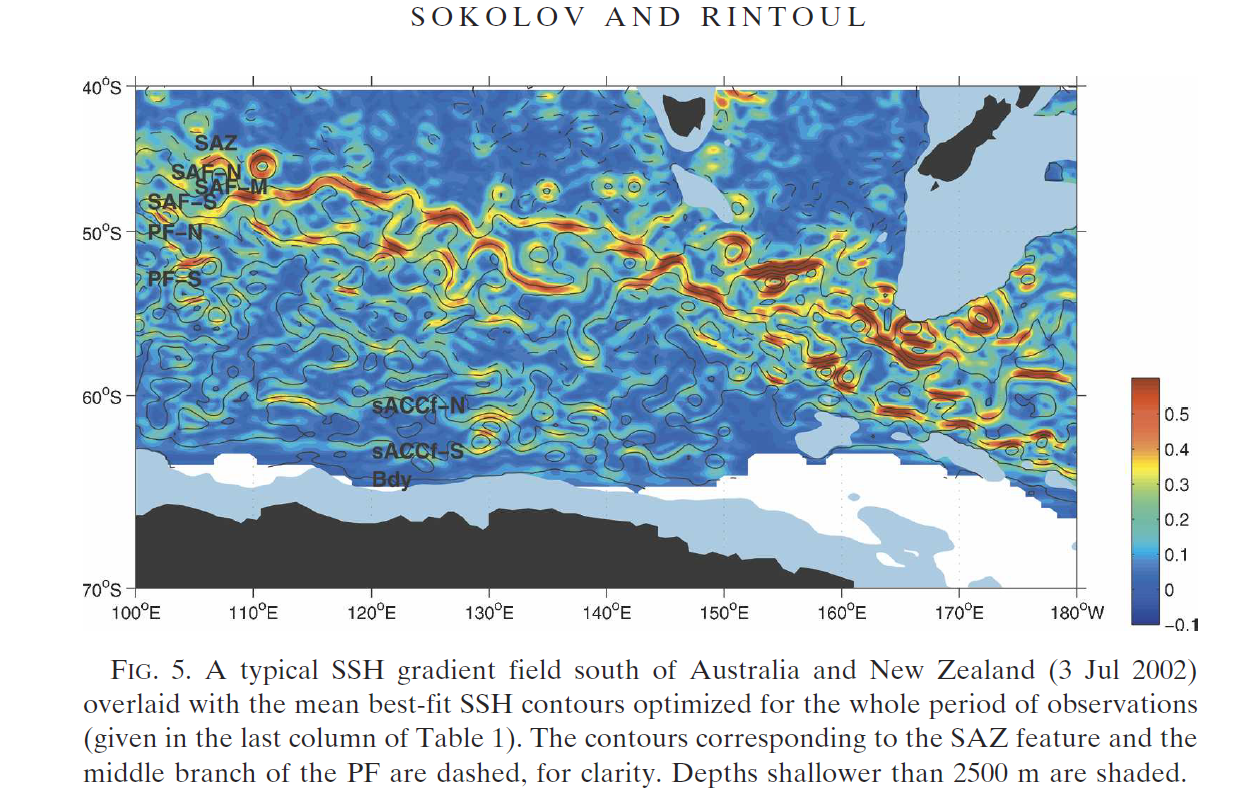

#### However, there are some caveats with this approach:
(i)  At the moment, the SSH data available by altimeters is in a coarse resolution in space (.25$\degree) and time (daily) products;
    
    --> The soon-to-be available data by the SWOT mission will improve the comparison between the peaks in SSH gradient and the position of the observations

(ii) There are regions where the compensation between temperature and salinity are not detected by the SSH gradient. In this case, temperature and salinity fronts are not depicted by the SSH gradient

## The algorithm
--> The function <b>returns the in situ dataset with the variables at the position of the fronts indentified by the altimeter<b>.

The algorithm tracks whether or not the in situ observations where found within a mesoscale front (i.e., region of high values of $\nabla(SSH)$). Also, it returns the strength level of the frontal filament observed by the in situ observation. The strength level relies on the gradient of the chosen variable of the in situ observation.

    --> This approach may help identifying submesoscale fronts within mesoscale fronts.


The function may be run with two methods: (i) 'jet_front' or (ii) 'front_grad'. 

## Product

--> The top figure above shows the position of the fronts in the 'jet_front' method. It combines the two definitions (peaks in SSH gradients and high values in the gradient of the chosen value in the in situ observations). 

--> The bottom figure shows the fronts captured by the temperature gradient only.

The light red circles illustrate the positions of all the measurements by the in situ profiler.

(-180.0, 180.0)

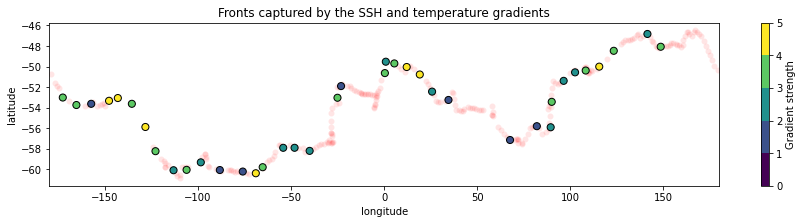

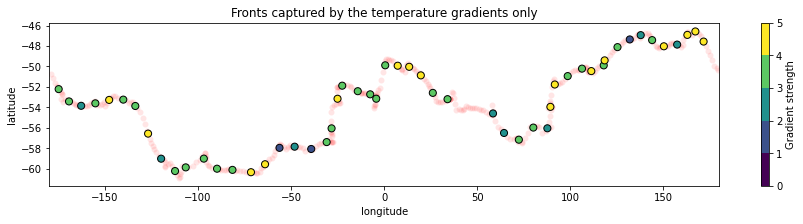

In [68]:
fig, ax = plt.subplots(figsize = (15,3))

cmap = plt.cm.viridis
norm = mpl.colors.BoundaryNorm(np.arange(0, len(criterion)+1, 1), cmap.N)

plt.scatter(gdf_nogradSSH.longitude, gdf_nogradSSH.latitude, c = 'r', label = 'no SSH grad', alpha = .1,
            edgecolors = 'w')
plt.scatter(temp_fronts_jets.longitude, temp_fronts_jets.latitude, c = temp_fronts_jets.level, norm = norm, s = 50,
            edgecolors = 'k')

# CS = mean_sea_level.plot.contour(colors = 'dimgrey', alpha = 0.5, linewidths = 1.2, levels = adt_levels)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label = 'Gradient strength', ticks = np.arange(0, len(criterion)+1, 1))
plt.title('Fronts captured by the SSH and temperature gradients')
plt.xlim(-180,180)

########################################################

fig, ax = plt.subplots(figsize = (15,3))

cmap = plt.cm.viridis
norm = mpl.colors.BoundaryNorm(np.arange(0, len(criterion)+1, 1), cmap.N)

plt.scatter(gdf.longitude, gdf.latitude, c = 'r', label = 'no SSH grad', alpha = .1,
            edgecolors = 'w')
plt.scatter(temp_fronts.longitude, temp_fronts.latitude, c = temp_fronts.level, norm = norm, s = 50,
            edgecolors = 'k')

# CS = mean_sea_level.plot.contour(colors = 'dimgrey', alpha = 0.5, linewidths = 1.2, levels = adt_levels)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label = 'Gradient strength', ticks = np.arange(0, len(criterion)+1, 1))
plt.title('Fronts captured by the temperature gradients only')
plt.xlim(-180,180)


--> Circumpolar view of the 'jet_front' product

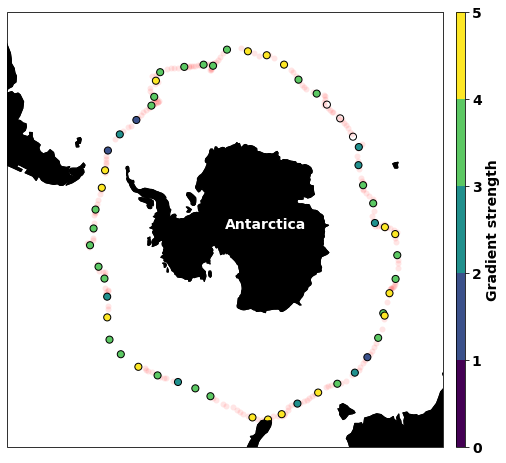

In [72]:
plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
extent = [-180, 180, -42, -42]

ax.set_extent(extent, ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, facecolor='k', zorder=10)
ax.add_feature(cartopy.feature.COASTLINE)
ax.annotate('Antarctica',color='w',xy=(0,0),xycoords='data',annotation_clip=False, zorder =100)
    
ax.scatter(gdf_nogradSSH.longitude, gdf_nogradSSH.latitude, transform=ccrs.PlateCarree(),
           c = 'r', label = 'no SSH grad', alpha = .1, edgecolors = 'w')
sc = ax.scatter(temp_fronts.longitude, temp_fronts.latitude, transform=ccrs.PlateCarree(),
                c = temp_fronts.level, norm = norm, s = 50, edgecolors = 'k')

####################################### Colorbar
bar = plt.axes([0.78, 0.125, 0.01, 0.755])
cbar = plt.colorbar(sc, cax = bar)
# cbar.ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
# cbar.ax.tick_params(labelsize=12)
cbar.set_label(r'Gradient strength') 